In [ ]:
# importing all needed libraries
import pandas as pd
import numpy as n
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

# Description of dataset


###This dataset has variety of data about resales of cars.contains 17.4k+ rows

#Features
###     full_name:full name of the car

###     resale_price: resale price of the car

###     registered_year:year that the car registered

###     engine_capacity:engine capacity of the car (cc)

###     insurance: insurance scheme of the car

###     transmission_type:whether the car is manual or automatic

###     kms_driven:how many kilometers the car has driven

###     owner_type:whether the car is first hand or second hand or third

###     fuel_type:whether the car is petrol or diesel or electric

###     max_power: horse power of the car

###     seats: how many seats the car have

###     mileage:mileage of the car

###    body_type:type of the car('MUV', 'Sedan', 'Minivans', 'SUV' ,'Pickup'...)

###     city:city that the car is in



# Target Variable:
###   find out the resale_price of the car from all the other datas provided

# 1) Understand the data

In [ ]:
#Load csv dataset
df=pd.read_csv("/content/car_resale_prices.csv")

In [ ]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


In [ ]:
# check shape of the dataset
df.shape

(17446, 15)

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
full_name,object
resale_price,object
registered_year,object
engine_capacity,object
insurance,object
transmission_type,object
kms_driven,object
owner_type,object
fuel_type,object


In [ ]:
# show first 15 rows of the dataset
df.head(15)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra
5,5,2015 Hyundai i20 Active 1.2,₹ 4.70 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",First Owner,Petrol,81.86bhp,5.0,17.19 kmpl,Hatchback,Agra
6,6,2017 Tata Tiago 1.05 Revotorq XZ,₹ 3.60 Lakh,2017,1047 cc,Third Party insurance,Manual,"1,20,000 Kms",First Owner,Diesel,69bhp,5.0,27.28 kmpl,Hatchback,Agra
7,7,2010 Hyundai i10 Magna 1.1,₹ 2 Lakh,2010,1086 cc,Third Party insurance,Manual,"60,000 Kms",Second Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra
8,8,2016 Maruti Eeco 7 Seater Standard BSIV,₹ 3.70 Lakh,2016,1196 cc,Third Party insurance,Manual,"20,000 Kms",First Owner,Petrol,73bhp,7.0,15.37 kmpl,Minivans,Agra
9,9,2009 Hyundai Santro Xing GL,₹ 1.20 Lakh,2009,1086 cc,Third Party insurance,Manual,"30,000 Kms",First Owner,Petrol,62bhp,5.0,NaN,Hatchback,Agra


In [ ]:
# show last 15 rows of the dataset
df.tail(15)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
17431,17431,2017 Toyota Innova Crysta 2.8 GX AT BSIV,₹ 15.25 Lakh,Jun 2017,2755 cc,Comprehensive,Automatic,"93,000 Kms",First Owner,Diesel,171.5bhp,7.0,11.36 kmpl,MUV,Delhi
17432,17432,2012 Toyota Etios Liva G SP,₹ 2.85 Lakh,Jun 2012,1197 cc,Comprehensive,Manual,"70,000 Kms",Second Owner,Petrol,78.9bhp,5.0,17.71 kmpl,Hatchback,Delhi
17433,17433,2017 Maruti Swift LXI,₹ 4.25 Lakh,Jun 2017,1197 cc,Comprehensive,Manual,"25,000 Kms",Second Owner,Petrol,81.80bhp,5.0,21.21 kmpl,Hatchback,Delhi
17434,17434,2016 Hyundai Grand i10 Sportz,₹ 4.35 Lakh,Jun 2016,1197 cc,Comprehensive,Manual,"46,000 Kms",First Owner,Petrol,82bhp,5.0,18.9 kmpl,Hatchback,Delhi
17435,17435,2021 MG Hector Plus Sharp DCT,₹ 19.25 Lakh,Jun 2021,1451 cc,Third Party insurance,Automatic,"25,000 Kms",First Owner,Petrol,141bhp,6.0,11.67 kmpl,SUV,Delhi
17436,17436,2020 Skoda Superb Laurin & klement,₹ 29.50 Lakh,Dec 2020,1984 cc,Comprehensive,Automatic,"40,000 Kms",First Owner,Petrol,187.74bhp,5.0,15.1 kmpl,Sedan,Delhi
17437,17437,2022 Volkswagen Tiguan 2.0 TSI Elegance BSVI,₹ 33.75 Lakh,Apr 2022,1984 cc,Comprehensive,Automatic,"10,000 Kms",First Owner,Petrol,187.74bhp,5.0,12.65 kmpl,SUV,Delhi
17438,17438,2018 Renault Duster Petrol RXS CVT,₹ 7.75 Lakh,Jul 2018,1498 cc,Comprehensive,Automatic,"37,000 Kms",First Owner,Petrol,104.5bhp,5.0,14.99 kmpl,SUV,Delhi
17439,17439,2022 Maruti Baleno Alpha BSVI,₹ 9.50 Lakh,Apr 2022,1197 cc,Comprehensive,Manual,"9,500 Kms",First Owner,Petrol,88.50bhp,5.0,22.35 kmpl,Hatchback,Delhi
17440,17440,2016 Hyundai Elantra 2.0 SX Option AT,₹ 8.60 Lakh,Nov 2016,1999 cc,Comprehensive,Automatic,"67,634 Kms",First Owner,Petrol,149.92bhp,5.0,14.62 kmpl,Sedan,Delhi


In [ ]:
# show random 10 rows of the dataset
df.sample(10)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
12270,12270,2006 BMW 3 Series 320i,₹ 3 Lakh,2006,1995 cc,Third Party insurance,Automatic,"60,000 Kms",Third Owner,Petrol,154bhp,5.0,12.05 kmpl,Sedan,Mumbai
15256,15256,2020 Maruti Wagon R CNG LXI Opt,₹ 5.50 Lakh,2020,998 cc,Third Party insurance,Manual,"30,000 Kms",First Owner,CNG,58.33bhp,5.0,32.52 kmpl,Hatchback,Delhi
8466,8466,2018 Hyundai Creta 1.6 VTVT SX Plus,₹ 10.10 Lakh,Apr 2018,1591 cc,Comprehensive,Manual,"96,620 Kms",First Owner,Petrol,121.3bhp,5.0,13 kmpl,SUV,Hyderabad
2166,2166,2021 Hyundai Creta E BSVI,₹ 10.70 Lakh,Sept 2021,1497 cc,Not Available,Manual,"8,455 Kms",First Owner,Petrol,113.18bhp,5.0,NaN,SUV,Jaipur
11890,11890,2019 Ford Endeavour 3.2 Titanium AT 4X4,₹ 32 Lakh,2019,3198 cc,Third Party insurance,Automatic,"90,000 Kms",First Owner,Diesel,197bhp,7.0,10.91 kmpl,SUV,Mumbai
4324,4324,2019 Hyundai Grand i10 1.2 Kappa Sportz BSIV,₹ 5.50 Lakh,Jun 2019,1197 cc,Third Party insurance,Manual,"13,936 Kms",Second Owner,Petrol,81.86bhp,5.0,18.9 kmpl,Hatchback,Ahmedabad
2031,2031,2017 Maruti Ciaz 1.4 Alpha,₹ 6.07 Lakh,Sept 2017,1373 cc,Not Available,Manual,"38,943 Kms",First Owner,Petrol,91.1bhp,5.0,20.73 kmpl,Sedan,Jaipur
236,236,2017 Hyundai i20 1.4 Sportz,₹ 5.50 Lakh,2017,1396 cc,Third Party insurance,Manual,"1,00,000 Kms",First Owner,Diesel,88.73bhp,5.0,22.54 kmpl,Hatchback,Agra
13211,13211,2012 Maruti Swift Dzire VXI,₹ 2.92 Lakh,Nov 2012,1197 cc,Comprehensive,Manual,"65,611 Kms",First Owner,Petrol,88.50bhp,5.0,22.41 kmpl,Sedan,Delhi
12762,12762,2016 Maruti Baleno 1.2 Alpha,₹ 5.50 Lakh,2016,1197 cc,Third Party insurance,Manual,"30,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Mumbai


In [ ]:
# how many columns in the dataset
df.columns

Index(['Unnamed: 0', 'full_name', 'resale_price', 'registered_year',
       'engine_capacity', 'insurance', 'transmission_type', 'kms_driven',
       'owner_type', 'fuel_type', 'max_power', 'seats', 'mileage', 'body_type',
       'city'],
      dtype='object')

# 2) Data cleaning

In [ ]:
# identifing null values
df.isnull().sum()

,0
Unnamed: 0,0
full_name,0
resale_price,0
registered_year,69
engine_capacity,14
insurance,7
transmission_type,0
kms_driven,3
owner_type,45
fuel_type,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


In [ ]:
df['registered_year']=df['registered_year'].fillna(df['registered_year'].mode()[0])
df['engine_capacity']=df['engine_capacity'].fillna(df['engine_capacity'].mode()[0])
df['insurance']=df['insurance'].fillna(df['insurance'].mode()[0])
df['kms_driven']=df['kms_driven'].fillna(df['kms_driven'].mode()[0])
df['owner_type']=df['owner_type'].fillna(df['owner_type'].mode()[0])
df['max_power']=df['max_power'].fillna(df['max_power'].mode()[0])
df['seats']=df['seats'].fillna(df['seats'].median())
df['mileage']=df['mileage'].fillna(df['mileage'].mode())

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
full_name,0
resale_price,0
registered_year,0
engine_capacity,0
insurance,0
transmission_type,0
kms_driven,0
owner_type,0
fuel_type,0


In [ ]:
# checking duplicates
df.duplicated().sum()

0

In [ ]:
# changing class and replacing registered_year
df['registered_year']=df['registered_year'].str.replace('Dec','')
df['registered_year']=df['registered_year'].str.replace('Nov','')
df['registered_year']=df['registered_year'].str.replace('Oct','')
df['registered_year']=df['registered_year'].str.replace('Sept','')
df['registered_year']=df['registered_year'].str.replace('Aug','')
df['registered_year']=df['registered_year'].str.replace('Jul','')
df['registered_year']=df['registered_year'].str.replace('Jun','')
df['registered_year']=df['registered_year'].str.replace('May','')
df['registered_year']=df['registered_year'].str.replace('Apr','')
df['registered_year']=df['registered_year'].str.replace('Mar','')
df['registered_year']=df['registered_year'].str.replace('Feb','')
df['registered_year']=df['registered_year'].str.replace('Jan','')

In [ ]:
# registered_year convert to int datatype
df['registered_year']=df['registered_year'].astype(int)

In [ ]:
# Remove unwanted columns
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
# x=df[df.duplicated(keep=False)]
# x

In [ ]:
# identify unique values
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'Electric', 'LPG'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          17446 non-null  object 
 1   resale_price       17446 non-null  object 
 2   registered_year    17446 non-null  int64  
 3   engine_capacity    17446 non-null  object 
 4   insurance          17446 non-null  object 
 5   transmission_type  17446 non-null  object 
 6   kms_driven         17446 non-null  object 
 7   owner_type         17446 non-null  object 
 8   fuel_type          17446 non-null  object 
 9   max_power          17446 non-null  object 
 10  seats              17446 non-null  float64
 11  mileage            16938 non-null  object 
 12  body_type          17446 non-null  object 
 13  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.9+ MB


In [ ]:
# changing class and replacing fuel_type
df['fuel_type']=df['fuel_type'].str.replace('Petrol','1')
df['fuel_type']=df['resale_price'].str.replace('Diesel','2')
df['fuel_type']=df['fuel_type'].str.replace('CNG','3')
df['fuel_type']=df['fuel_type'].str.replace('LPG','4')
df['fuel_type']=df['fuel_type'].str.replace('Electric','5')

In [ ]:
# changing class and replaceing transmission_type
df['transmission_type']=df['transmission_type'].str.replace('Manual','1')
df['transmission_type']=df['transmission_type'].str.replace('Automatic','2')

In [ ]:
#  removing unwanted characters from resale_price
df['resale_price']=df['resale_price'].str.replace('Lakh','')
df['resale_price']=df['resale_price'].str.replace('₹','')
df['resale_price']=df['resale_price'].str.replace(',','')
df['resale_price']=df['resale_price'].str.replace('Crore','00')
df['resale_price']=df['resale_price'].str.replace(' ','')

In [ ]:
# changing datatype of resale_price
df['resale_price']=df['resale_price'].astype(float)

In [ ]:
# changing the column name
df=df.rename(columns={'resale_price in lakh':'resale_price_in_lakh'})

In [ ]:
# changing the column name of engine_capacity
df=df.rename(columns={'engine_capacity':'engine_capacity_in_cc'})

In [ ]:
# removing unwanted characters from engine_capacity
df['engine_capacity_in_cc']=df['engine_capacity_in_cc'].str.replace('cc','')
df['engine_capacity_in_cc']=df['engine_capacity_in_cc'].str.replace(' ','')
df['engine_capacity_in_cc']=df['engine_capacity_in_cc'].str.replace('0',df['engine_capacity_in_cc'].mode()[0])

In [ ]:
# removing unwanted characters from kms_driven
df['kms_driven']=df['kms_driven'].str.replace('Kms','')
df['kms_driven']=df['kms_driven'].str.replace(',','')

In [ ]:
# change column name of mileage
df=df.rename(columns={'mileage':'mileage_in_kmpl'})

In [ ]:
# removing unwanted characters from mileage
df['mileage_in_kmpl']=df['mileage_in_kmpl'].str.replace('kmpl','')
df['mileage_in_kmpl']=df['mileage_in_kmpl'].str.replace('km/kg','')

In [ ]:
# changing datatype of mileage
df['mileage_in_kmpl']=df['mileage_in_kmpl'].astype(float)

In [ ]:
# identify not repeated values in the dataset
df['transmission_type'].unique()

array(['1', '2'], dtype=object)

In [ ]:
df['kms_driven']=df['kms_driven'].astype('float')

In [ ]:
df['engine_capacity_in_cc']=df['engine_capacity_in_cc'].astype('float')

In [ ]:
df['owner_type'].unique()

array(['First Owner', 'Second Owner', 'Third Owner', 'Fifth Owner',
       'Fourth Owner'], dtype=object)

In [ ]:
df['owner_type']=df['owner_type'].str.replace('First Owner','1')
df['owner_type']=df['owner_type'].str.replace('Second Owner','2')
df['owner_type']=df['owner_type'].str.replace('Third Owner','3')
df['owner_type']=df['owner_type'].str.replace('Fourth Owner','4')
df['owner_type']=df['owner_type'].str.replace('Fifth Owner','5')

In [ ]:
# changing datatype of owner_type
df['owner_type']=df['owner_type'].astype(int)

In [ ]:
df['insurance']=df['insurance'].str.replace('Third Party insurance','Third Party')
df['insurance']=df['insurance'].str.replace('1','First party')
df['insurance']=df['insurance'].str.replace('2','Second party')

In [ ]:
# change column name of max_power
df=df.rename(columns={'max_power':'max_power_in_bhp'})

In [ ]:
for i in df.index:
    x=df.loc[i,'max_power_in_bhp']
    if 'bhp' in x:
        pass
    elif 'Bhp' in x:
        pass
    else:
        df.drop(i,inplace=True)

In [ ]:
# removing unwanted characters from max_power
for i in df.index:
    x=df.loc[i,'max_power_in_bhp']
    if 'at' in x:
        df.drop(i,inplace=True)

In [ ]:
for i in df.index:
    x=df.loc[i,'max_power_in_bhp']
    if 'rpm' in x:
        df.drop(i,inplace=True)

In [ ]:
for i in df.index:
    x=df.loc[i,'max_power_in_bhp']
    if '(' in x:
        df.drop(i,inplace=True)

In [ ]:
for i in df.index:
    x=df.loc[i,'max_power_in_bhp']
    if '-' in x:
        df.drop(i,inplace=True)

In [ ]:
for i in df.index:
    x=df.loc[i,'max_power_in_bhp']
    if 'kW' in  x:
        df.drop(i,inplace=True)

In [ ]:
df['max_power_in_bhp']=df['max_power_in_bhp'].str.replace('bhp','')

In [ ]:
df['max_power_in_bhp']=df['max_power_in_bhp'].str.replace('Bhp','')

In [ ]:
df['max_power_in_bhp']=df['max_power_in_bhp'].str.replace('kw','')

In [ ]:
# changing datatype of max_power
df['max_power_in_bhp']=df['max_power_in_bhp'].astype(float)

In [ ]:
# changing datatype of transmission_type
df['transmission_type']=df['transmission_type'].astype(int)

In [ ]:
df['insurance']=df['insurance'].str.replace('Third Party','3')
df['insurance']=df['insurance'].str.replace('First party','1')
df['insurance']=df['insurance'].str.replace('Second party','2')
df['insurance']=df['insurance'].str.replace('Not Available','0')
df['insurance']=df['insurance'].str.replace('Zero Dep','0')
df['insurance']=df['insurance'].str.replace('Comprehensive','4')

In [ ]:
# replace string to int
df['insurance']=df['insurance'].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a=['full_name','body_type','city','fuel_type']
for i in a:
    df[i]=le.fit_transform(df[i])

In [ ]:
# converted balance features into numerical values

# 3) Descriptive statistics

In [ ]:
df.describe()

,full_name,resale_price,registered_year,engine_capacity_in_cc,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power_in_bhp,seats,mileage_in_kmpl,body_type,city
count,16763.000000,16763.000000,16763.000000,1.676300e+04,16763.000000,16763.000000,1.676300e+04,16763.000000,16763.000000,16763.000000,16763.000000,16270.000000,16763.000000,16763.000000
mean,3107.084472,626.235333,2016.698920,1.223206e+09,3.116924,1.285748,5.742760e+04,1.339796,919.749866,103.638674,5.201515,19.540061,13.268150,6.200561
std,1773.912079,6862.706336,3.442329,7.907893e+10,1.062952,0.451784,6.490334e+04,0.605651,433.694244,44.798976,0.659356,4.473017,5.623024,3.515521
min,0.000000,1.000000,2002.000000,7.200000e+01,0.000000,1.000000,2.860000e+02,1.000000,0.000000,25.400000,2.000000,6.700000,0.000000,0.000000
25%,1565.000000,4.000000,2014.000000,1.197000e+03,3.000000,1.000000,3.090000e+04,1.000000,598.000000,78.900000,5.000000,17.050000,7.000000,4.000000
50%,3034.000000,6.000000,2017.000000,1.248000e+03,3.000000,1.000000,5.300000e+04,1.000000,970.000000,88.500000,5.000000,19.080000,18.000000,5.000000
75%,4551.500000,9.500000,2019.000000,1.586000e+03,4.000000,2.000000,7.726250e+04,2.000000,1262.000000,118.350000,5.000000,21.700000,19.000000,9.000000
max,6498.000000,99999.000000,2023.000000,5.119712e+12,4.000000,2.000000,6.275000e+06,5.000000,1710.000000,558.000000,14.000000,140.000000,23.000000,12.000000


In [ ]:
print(df["engine_capacity_in_cc"].value_counts())

engine_capacity_in_cc
1197.0       3360
998.0        1397
1199.0        961
1248.0        884
1497.0        866
             ... 
2651197.0       1
2362.0          1
3471.0          1
1948.0          1
1388.0          1
Name: count, Length: 141, dtype: int64


In [ ]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16763 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   full_name              16763 non-null  int64  
 1   resale_price           16763 non-null  float64
 2   registered_year        16763 non-null  int64  
 3   engine_capacity_in_cc  16763 non-null  float64
 4   insurance              16763 non-null  int64  
 5   transmission_type      16763 non-null  int64  
 6   kms_driven             16763 non-null  float64
 7   owner_type             16763 non-null  int64  
 8   fuel_type              16763 non-null  int64  
 9   max_power_in_bhp       16763 non-null  float64
 10  seats                  16763 non-null  float64
 11  mileage_in_kmpl        16270 non-null  float64
 12  body_type              16763 non-null  int64  
 13  city                   16763 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.4 MB


# 4) Data visualization

array([[<Axes: title={'center': 'full_name'}>,
        <Axes: title={'center': 'resale_price'}>,
        <Axes: title={'center': 'registered_year'}>,
        <Axes: title={'center': 'engine_capacity_in_cc'}>],
       [<Axes: title={'center': 'insurance'}>,
        <Axes: title={'center': 'transmission_type'}>,
        <Axes: title={'center': 'kms_driven'}>,
        <Axes: title={'center': 'owner_type'}>],
       [<Axes: title={'center': 'fuel_type'}>,
        <Axes: title={'center': 'max_power_in_bhp'}>,
        <Axes: title={'center': 'seats'}>,
        <Axes: title={'center': 'mileage_in_kmpl'}>],
       [<Axes: title={'center': 'body_type'}>,
        <Axes: title={'center': 'city'}>, <Axes: >, <Axes: >]],
      dtype=object)

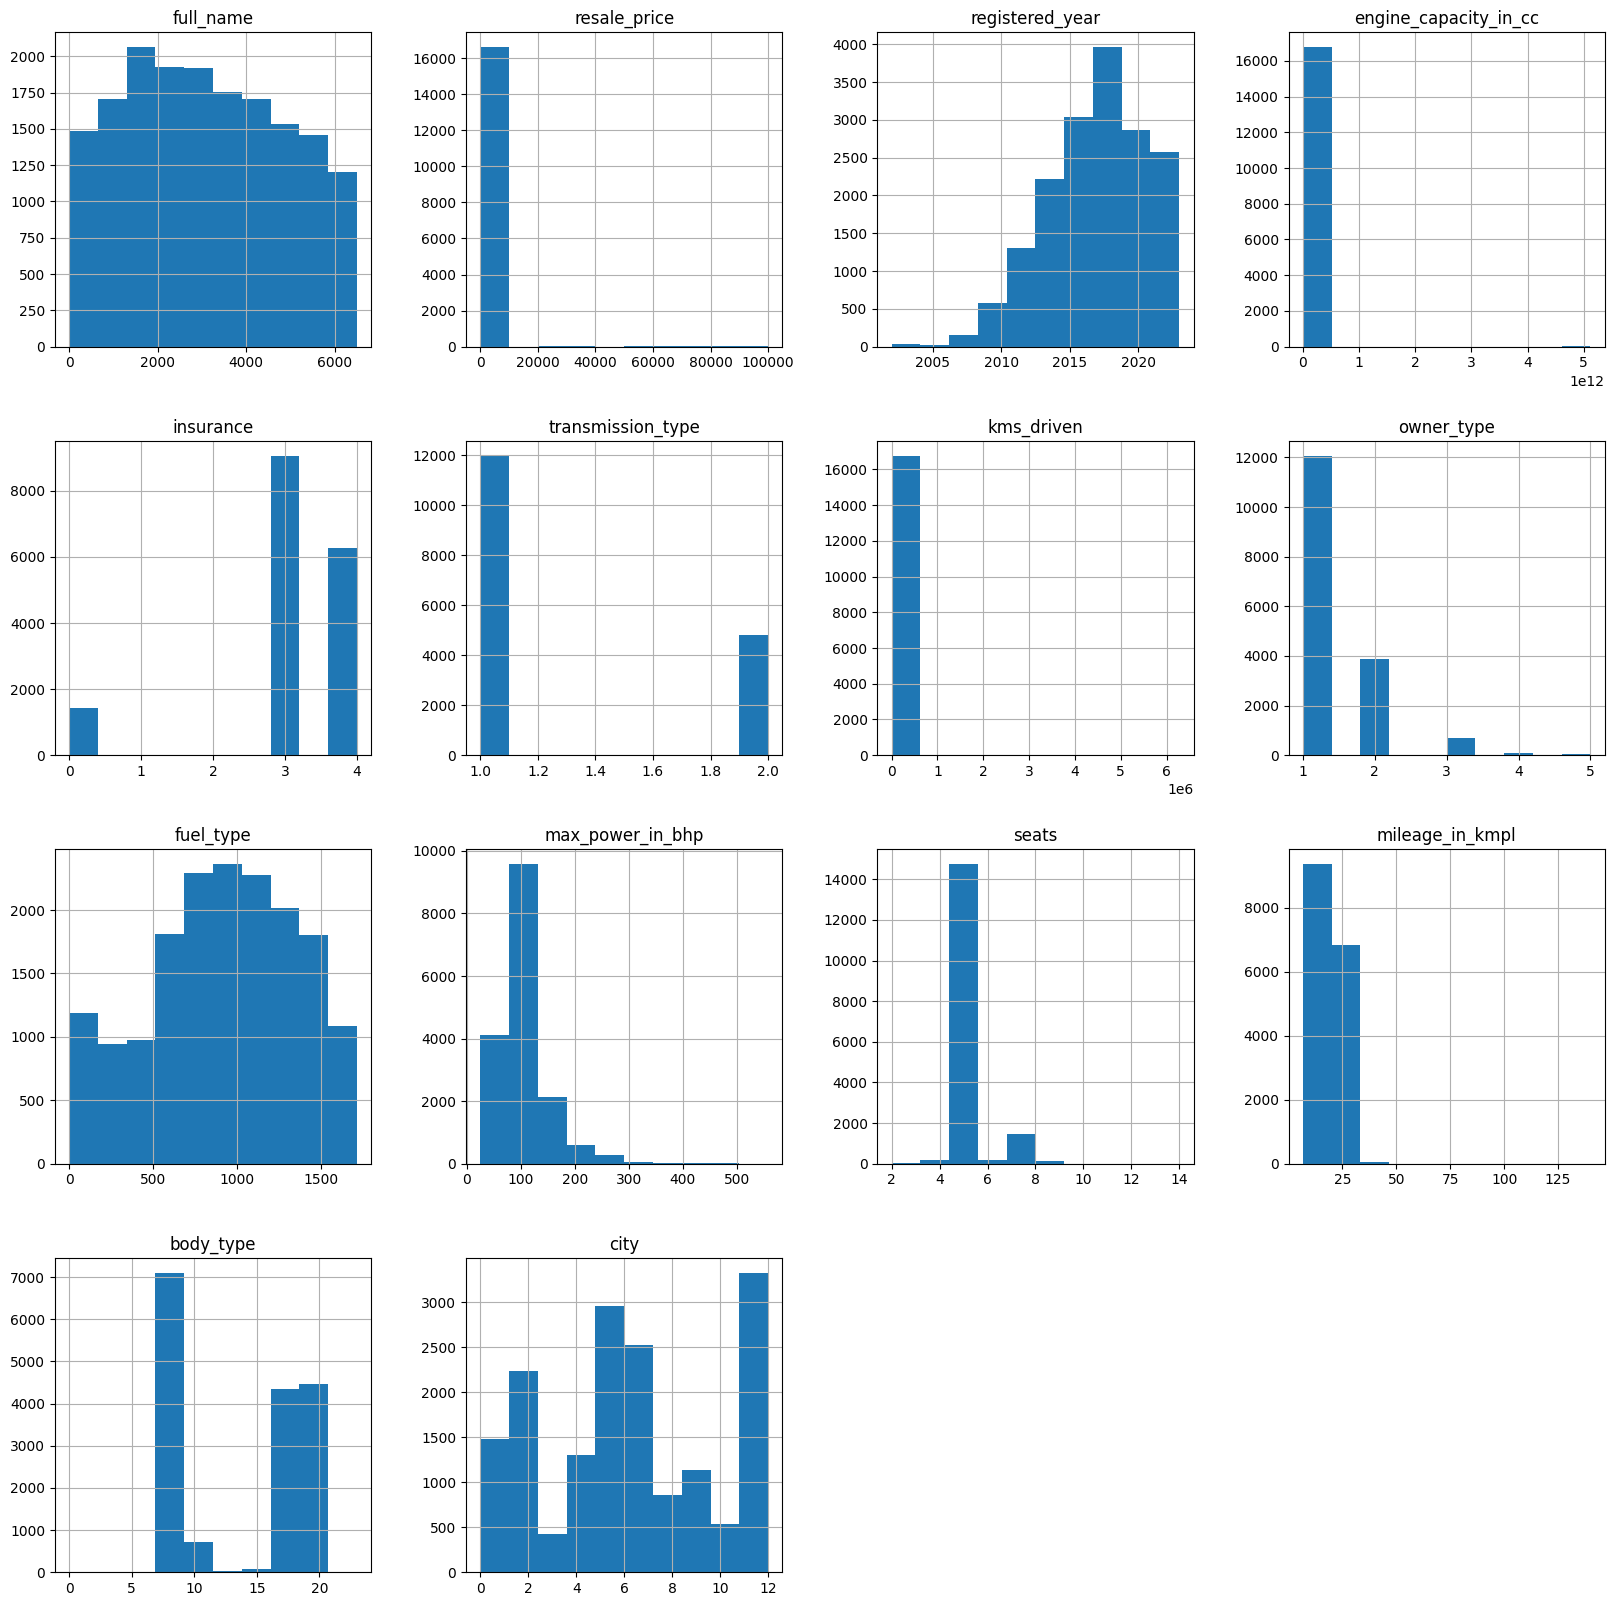

In [ ]:
# visualization skewness
df.hist(figsize=(20,20))

,0
full_name,"Axes(0.125,0.747241;0.227941x0.132759)"
resale_price,"Axes(0.398529,0.747241;0.227941x0.132759)"
registered_year,"Axes(0.672059,0.747241;0.227941x0.132759)"
engine_capacity_in_cc,"Axes(0.125,0.587931;0.227941x0.132759)"
insurance,"Axes(0.398529,0.587931;0.227941x0.132759)"
transmission_type,"Axes(0.672059,0.587931;0.227941x0.132759)"
kms_driven,"Axes(0.125,0.428621;0.227941x0.132759)"
owner_type,"Axes(0.398529,0.428621;0.227941x0.132759)"
fuel_type,"Axes(0.672059,0.428621;0.227941x0.132759)"
max_power_in_bhp,"Axes(0.125,0.26931;0.227941x0.132759)"


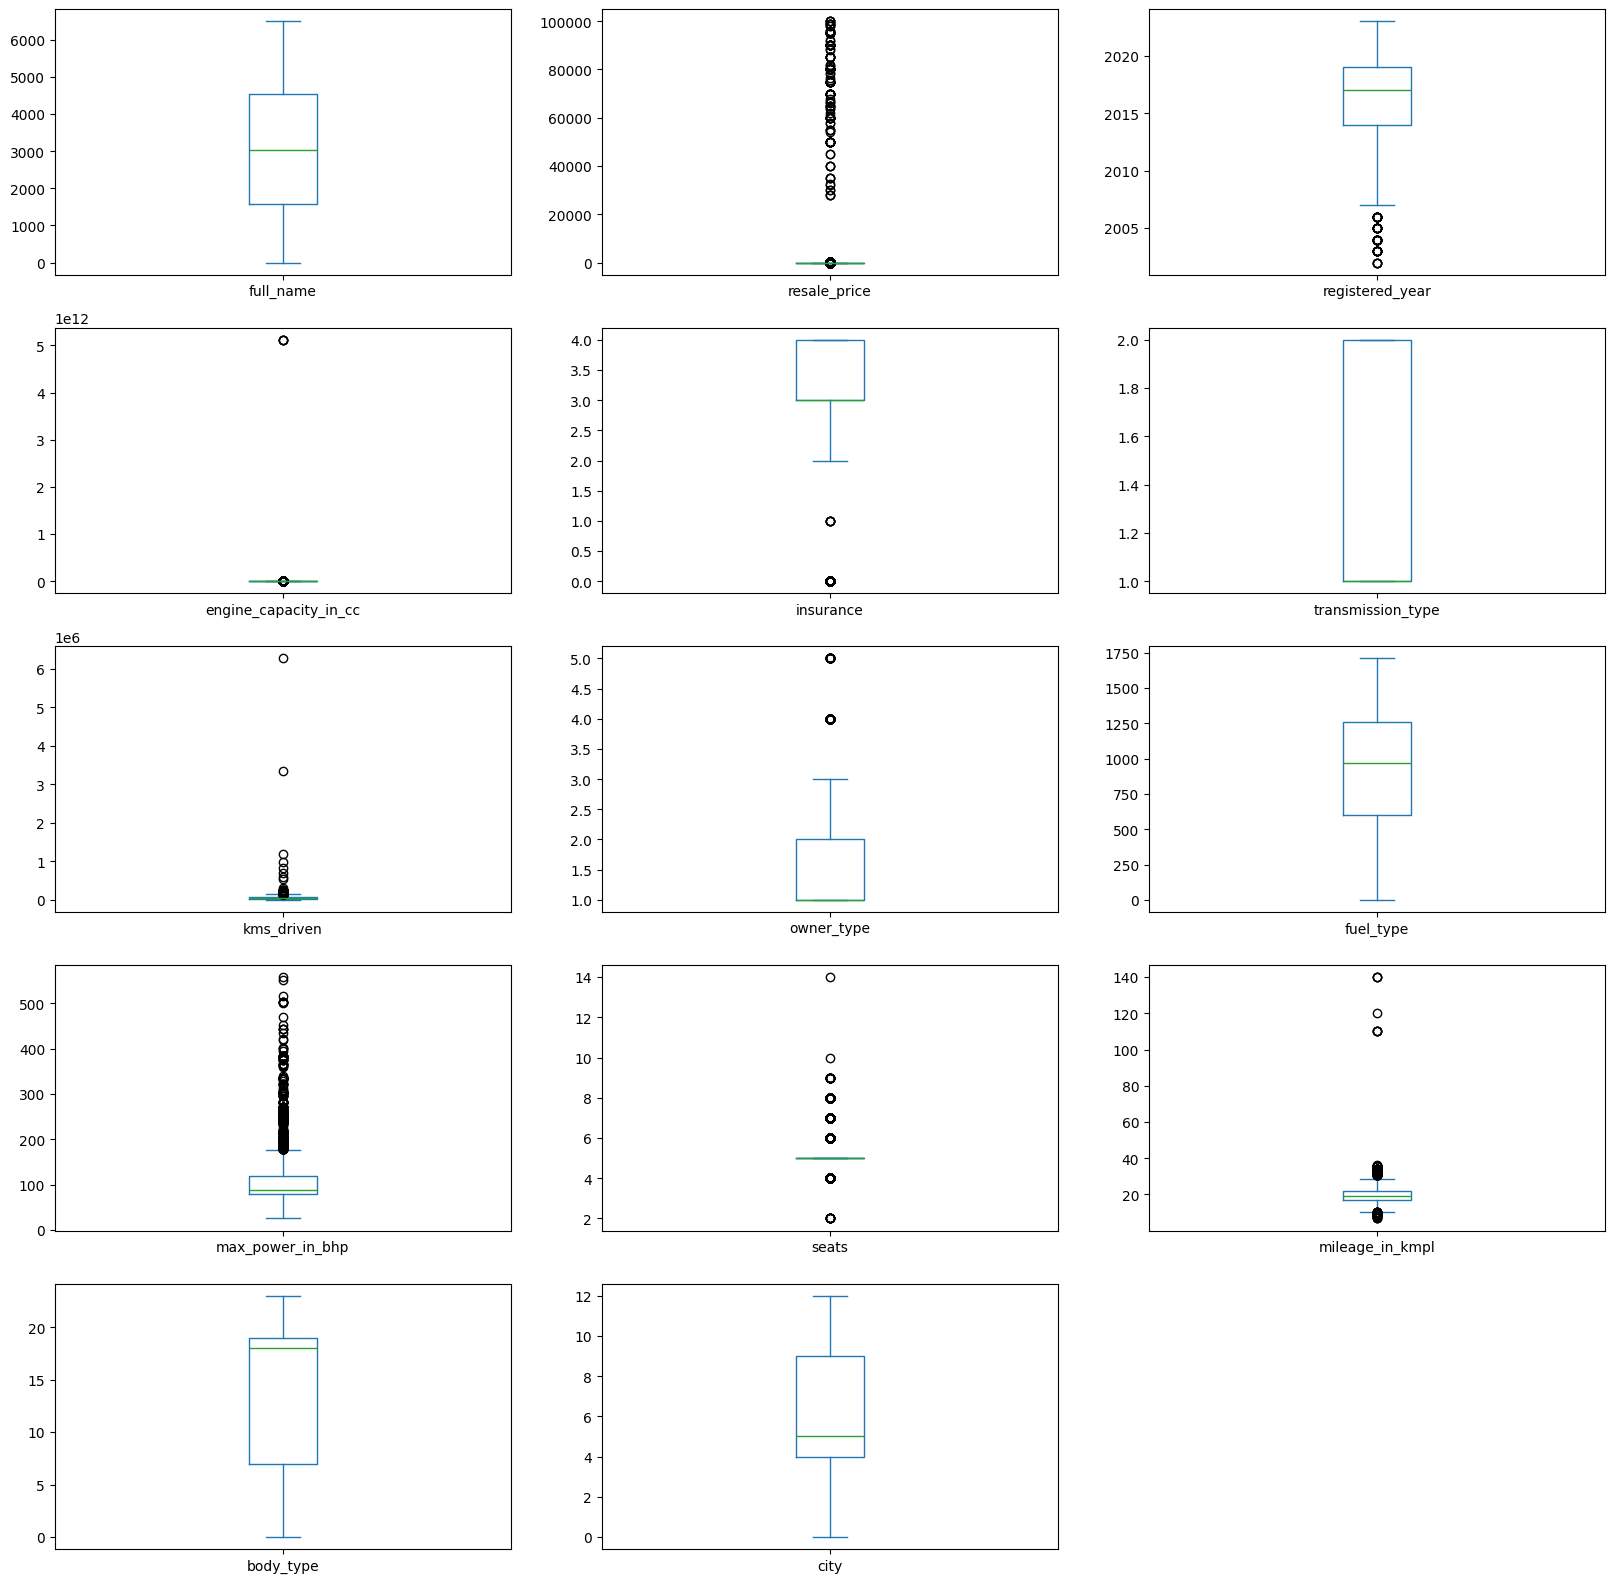

In [ ]:
# there lots of outliers in resale price,max_power_in_bhp,mileage_in_kmpl,owner_type,seats
# there is very rare outliers in full_name,engine_capacity_in_cc,insurance ,transmission_type ,kms_driven ,fuel_type ,body_type,city
#there is lot of skewness in many features
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(20,20))

# 5) Correlation

In [ ]:
c=df.corr()

<Axes: >

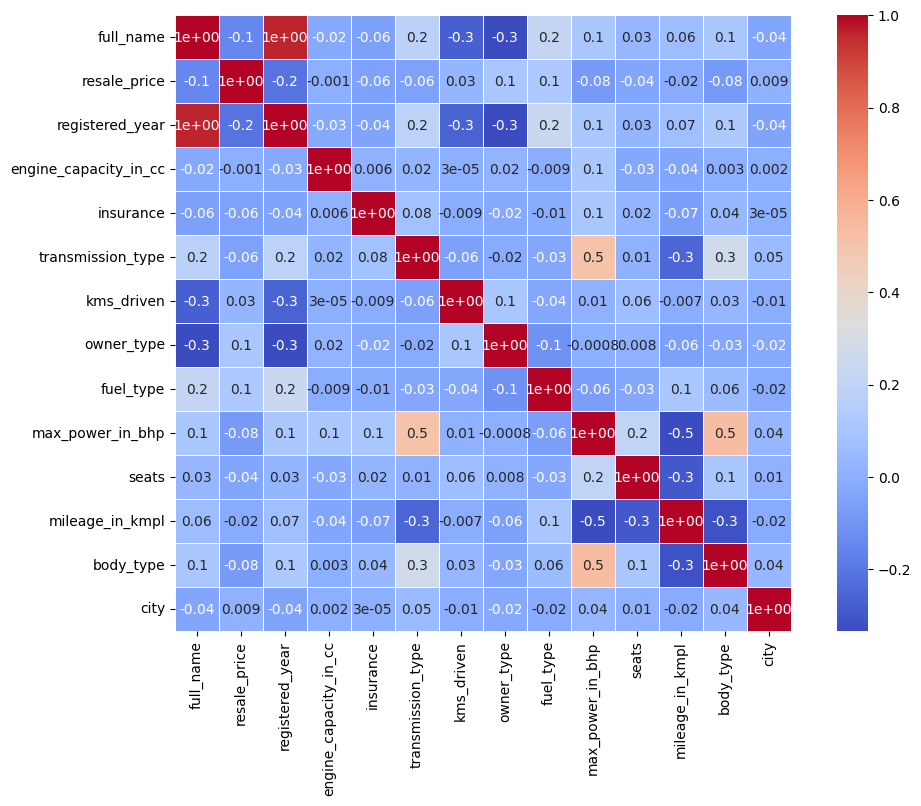

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(c,annot=True,cmap='coolwarm',robust=True,fmt='0.01',linewidths=0.5,square=True)

In [ ]:
#  we have to drop full_name or registerd_year since both of them have high correlation with each other
# and none of them have a good correlation with the target feature.so it shows the data set is non linear,and we have select a non linear model to train

In [ ]:
# from scipy import stats
# #except target
# c=['full_name','resale_price', 'registered_year', 'engine_capacity_in_cc',
#        'insurance', 'transmission_type', 'kms_driven', 'owner_type',
#        'fuel_type', 'max_power_in_bhp', 'seats', 'mileage_in_kmpl',
#        'body_type', 'city']
# for i in c:
#     zs=n.abs(stats.zscore(df[i]))
#     o=df[zs>3]
#     print(f'number of outliers in {i} : {o.shape[0]}')

# 6) Outlier detection

In [ ]:
from scipy import stats
# Z-score to detect outliers
#except target
c=['full_name','resale_price', 'registered_year', 'engine_capacity_in_cc',
       'insurance', 'transmission_type', 'kms_driven', 'owner_type',
       'fuel_type', 'max_power_in_bhp', 'seats', 'mileage_in_kmpl',
       'body_type', 'city']
for i in c:
    zs=n.abs(stats.zscore(df[i]))
    o=df[zs>3]
    print(f'number of outliers in {i} : {o.shape[0]}')

number of outliers in full_name : 0
number of outliers in resale_price : 144
number of outliers in registered_year : 62
number of outliers in engine_capacity_in_cc : 4
number of outliers in insurance : 0
number of outliers in transmission_type : 0
number of outliers in kms_driven : 13
number of outliers in owner_type : 130
number of outliers in fuel_type : 0
number of outliers in max_power_in_bhp : 360
number of outliers in seats : 158
number of outliers in mileage_in_kmpl : 0
number of outliers in body_type : 0
number of outliers in city : 0


In [ ]:

# # remove outliers in max_power_in_bhp,mileage_in_kmpl,engine_capacity_in_cc,kms_driven using quartiles,resale price didnot changed becouse it is the target variable.
# # x=['max_power_in_bhp','owner_type','mileage_in_kmpl','seats','engine_capacity_in_cc','kms_driven']
# x=['max_power_in_bhp','mileage_in_kmpl','engine_capacity_in_cc','kms_driven','owner_type','seats']
# for i in x:
#     Q1=n.quantile(df[i],0.25)
#     Q3=n.quantile(df[i],0.75)
#     Q2=n.quantile(df[i],0.5)
#     IQR=Q3-Q1
#     upper_bound=Q3+1.5*IQR
#     lower_bound=Q1-1.5*IQR
#     df=df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]

In [ ]:
c=['max_power_in_bhp','mileage_in_kmpl','engine_capacity_in_cc','kms_driven','owner_type','seats']

for i in c:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR)))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12251 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   full_name              12251 non-null  int64  
 1   resale_price           12251 non-null  float64
 2   registered_year        12251 non-null  int64  
 3   engine_capacity_in_cc  12251 non-null  float64
 4   insurance              12251 non-null  int64  
 5   transmission_type      12251 non-null  int64  
 6   kms_driven             12251 non-null  float64
 7   owner_type             12251 non-null  int64  
 8   fuel_type              12251 non-null  int64  
 9   max_power_in_bhp       12251 non-null  float64
 10  seats                  12251 non-null  float64
 11  mileage_in_kmpl        12017 non-null  float64
 12  body_type              12251 non-null  int64  
 13  city                   12251 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 1.4 MB


In [ ]:
df.columns

Index(['full_name', 'resale_price', 'registered_year', 'engine_capacity_in_cc',
       'insurance', 'transmission_type', 'kms_driven', 'owner_type',
       'fuel_type', 'max_power_in_bhp', 'seats', 'mileage_in_kmpl',
       'body_type', 'city'],
      dtype='object')

In [ ]:
from scipy import stats
# numbers of outliers is reduced after filer out outliers in all fetures except seats
#except target
c=['full_name','resale_price', 'registered_year', 'engine_capacity_in_cc',
       'insurance', 'transmission_type', 'kms_driven', 'owner_type',
       'fuel_type', 'max_power_in_bhp', 'seats', 'mileage_in_kmpl',
       'body_type', 'city']
for i in c:
    zs=n.abs(stats.zscore(df[i]))
    o=df[zs>3]
    print(f'number of outliers in {i} : {o.shape[0]}')

number of outliers in full_name : 0
number of outliers in resale_price : 68
number of outliers in registered_year : 20
number of outliers in engine_capacity_in_cc : 3
number of outliers in insurance : 0
number of outliers in transmission_type : 0
number of outliers in kms_driven : 0
number of outliers in owner_type : 474
number of outliers in fuel_type : 0
number of outliers in max_power_in_bhp : 126
number of outliers in seats : 0
number of outliers in mileage_in_kmpl : 0
number of outliers in body_type : 0
number of outliers in city : 0


In [ ]:
# x=['max_power_in_bhp','owner_type','registered_year ','mileage_in_kmpl','seats ']
# for i in x:
#     zs=n.abs(stats.zscore(df[i]))
#     df=df[(df[i]!=df[zs>3])]
# df.info()

,0
full_name,"Axes(0.125,0.747241;0.227941x0.132759)"
resale_price,"Axes(0.398529,0.747241;0.227941x0.132759)"
registered_year,"Axes(0.672059,0.747241;0.227941x0.132759)"
engine_capacity_in_cc,"Axes(0.125,0.587931;0.227941x0.132759)"
insurance,"Axes(0.398529,0.587931;0.227941x0.132759)"
transmission_type,"Axes(0.672059,0.587931;0.227941x0.132759)"
kms_driven,"Axes(0.125,0.428621;0.227941x0.132759)"
owner_type,"Axes(0.398529,0.428621;0.227941x0.132759)"
fuel_type,"Axes(0.672059,0.428621;0.227941x0.132759)"
max_power_in_bhp,"Axes(0.125,0.26931;0.227941x0.132759)"


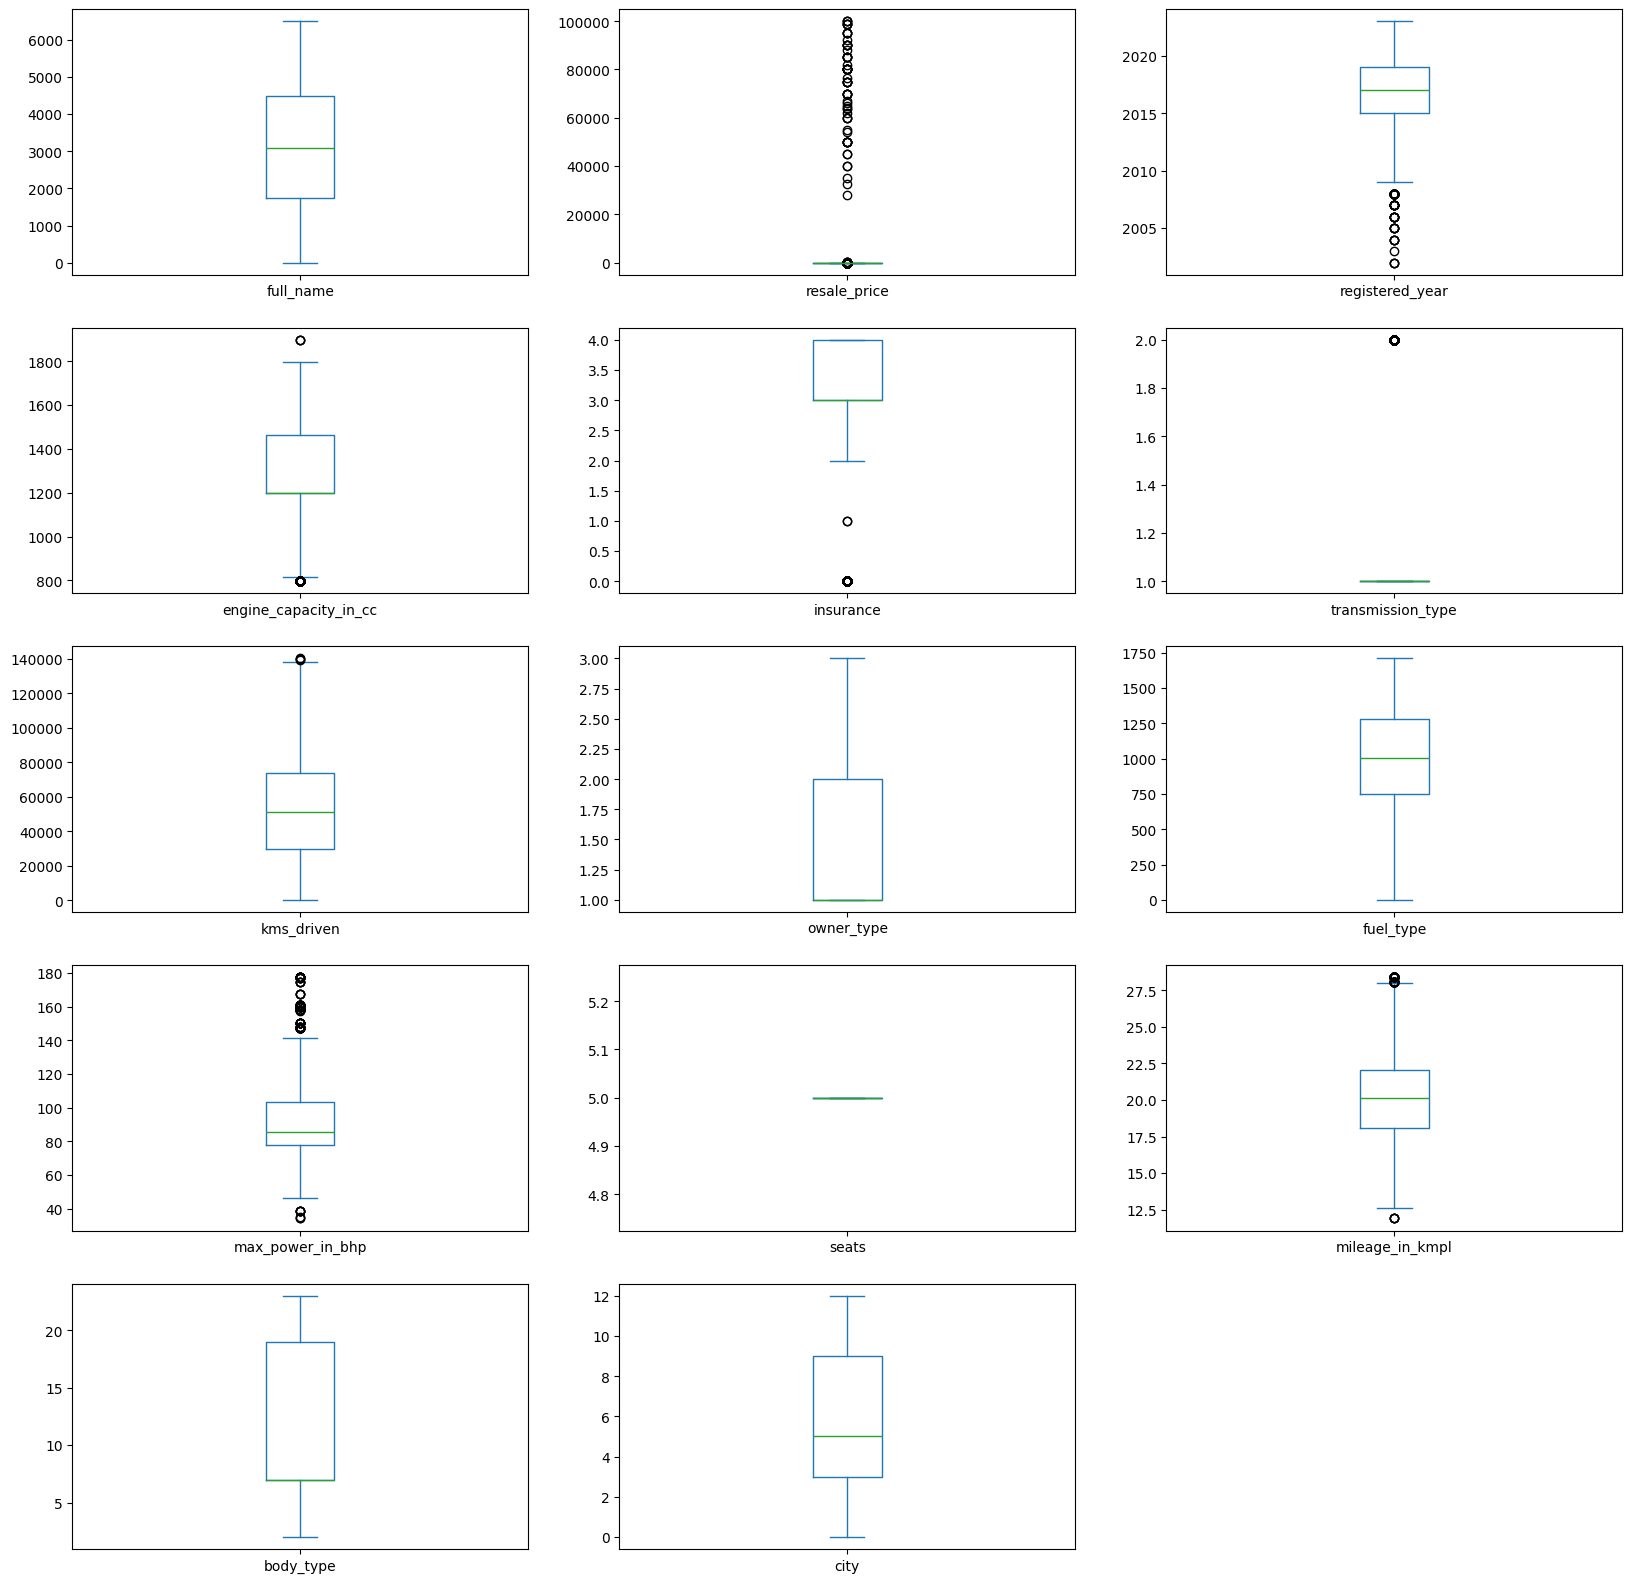

In [ ]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(20,20))

In [ ]:
df.skew()

,0
full_name,0.103525
resale_price,14.399627
registered_year,-0.431468
engine_capacity_in_cc,0.043369
insurance,-1.894600
transmission_type,1.366574
kms_driven,0.404583
owner_type,1.586581
fuel_type,-0.489053
max_power_in_bhp,0.642847


# 7) Feature engineering

In [ ]:
df.drop(columns='registered_year',inplace=True)

In [ ]:
# reducing all features range except target using log1p to reduce skewness
#engine,insurance,kms
c=['full_name', 'engine_capacity_in_cc',
       'insurance', 'transmission_type', 'kms_driven', 'owner_type',
       'fuel_type', 'max_power_in_bhp', 'seats', 'mileage_in_kmpl',
       'body_type','city']
for i in c:
    df[i]=n.log1p(df[i])

# 8) Dimensionality reduction

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# # Standardize the features before PCA
# c=['full_name', 'engine_capacity_in_cc',
#        'insurance', 'transmission_type', 'kms_driven', 'owner_type',
#        'fuel_type', 'max_power_in_bhp', 'seats', 'mileage_in_kmpl',
#        'body_type','city']
# X=StandardScaler().fit_transform(df[c])

# # Apply PCA
# pca=PCA(n_components=2)
# pca_r=pca.fit_transform(X)

# # Add PCA results to the DataFrame
# df['pca1']=pca_r[:,0]
# df['pca2']=pca_r[:,1]


# # Visualize PCA results
# sns.scatterplot(x='pca1',y='pca2',hue='resale_price',data=df)
# plt.title('PCA of Car Data')
# plt.show()


# 9) Data scailing

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
##Standardization (mean = 0, std = 1)

# scaler=StandardScaler()
# df[[  "full_name",    "engine_capacity_in_cc",  "insurance",   "transmission_type",    "kms_driven",   "owner_type",   "fuel_type",    "max_power_in_bhp",   "seats",   "mileage_in_kmpl",   "body_type"]]=scaler.fit_transform(df[[  "full_name",    "engine_capacity_in_cc",  "insurance",   "transmission_type",    "kms_driven",   "owner_type",   "fuel_type",    "max_power_in_bhp",   "seats",   "mileage_in_kmpl",   "body_type"]])

# # Normalization (scaling to 0-1 range)
minmax_scaler=MinMaxScaler()
df[[  "full_name",    "engine_capacity_in_cc",  "insurance",   "transmission_type",    "kms_driven",   "owner_type",   "fuel_type",    "max_power_in_bhp",   "seats",   "mileage_in_kmpl",   "body_type","city"]]=minmax_scaler.fit_transform(df[[  "full_name",    "engine_capacity_in_cc",  "insurance",   "transmission_type",    "kms_driven",   "owner_type",   "fuel_type",    "max_power_in_bhp",   "seats",   "mileage_in_kmpl",   "body_type","city"]])

# 10) Initial modeling and hypothesis testing

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
model =DecisionTreeRegressor()
# Define features and target variable
x = df[[  "full_name",    "engine_capacity_in_cc",  "insurance",   "transmission_type",
        "kms_driven",   "owner_type",   "fuel_type",    "max_power_in_bhp",   "seats",
        "mileage_in_kmpl",   "body_type" ,"city"]]
y = df["resale_price"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#decision tree giving higher accuracy value other than non linear models

In [ ]:
# Predict and evaluate the model
r2=r2_score(y_test,y_pred)
print(f'Baseline model r2score: {r2}')
mae=mean_absolute_error(y_test,y_pred)
print(f'Baseline model mae: {mae}')
mse=mean_squared_error(y_test,y_pred)
#print(f'Baseline model mse: {mse}')
rmse=sqrt(mse)
print(f'Baseline model rmse: {rmse}')
perer=[((n.abs(y_test-y_pred))/y_test)*100]
print(f'Baseline model percentage error: {n.mean(perer)}')

Baseline model r2score: 0.9991085381247448
Baseline model mae: 6.0600571195430435
Baseline model rmse: 175.20880940938795
Baseline model percentage error: 0.6685051863818908


# Summary

This model had 17k+ entries,and 14 columns
i droped registerd year  column,becouse it was unrelated
there were some duplicates in the dataset,i cleaned it
there were some signs must be cleaned
renamed some columns based on its common unit
this model model shows high accurasy in decision tree algorithm
there were lot of null values,i have to drop the values,becouse if we fill lot of null values .it will leads to an error
 i decided to label encode some features,but some them replaced by values
there were some unites to converted,so i converted the units
some features were different on scale,so i  decided to do data scailing
i got better results in min max scaler than standard scaler,so i took minmax scaler
when i plot boxplot,there were lot of outliers,so i found the numbers of outliers in each column using iqr method
i used 2 in quantiles eqn instead of 1.5,becouse we can maintain some small ranged outliers for raelity.
while plotting histogram of the features i found many of the features are skewed ,so i decided to convert those features in to logariyhmic scale
we must use regression algorithm here,becouse dataset is continous value to be predicted
i compared model accurasy after dimensionality reduction using pca with 2 components,but there were no better result,so idecided to not use pca